### Ejercicio 1.5: Registro de Eventos Hospitalarios
Descripción: Analizar eficiencia y patrones en un registro de eventos hospitalarios.
## Instrucciones:
1. Trabajar con datos de:
   
-  Número de ingreso
- Fecha de admisión/alta
- Especialidad médica
-  Duración de estancia
-  Diagnóstico principal
- Procedimientos realizados
2. Realizar análisis:

- Calcular tiempos de estancia promedio
-  Identificar especialidades con mayor carga
- Analizar distribución de diagnósticos
- Crear indicadores de eficiencia hospitalaria

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

In [2]:
def generar_datos_hospitalarios(n_eventos = 1000):
    np.random.seed(42)

    #Especialidades médicas
    especialidades = [
        'Cardiologia', 'Neurologia', 'Oncologia',
        'Traumatologia', 'Medicina Interna' 'Pediatria'
    ]

    diagnosticos = [
        'Infarto', 'Ictus', 'Tumor', 'Fractura',
        'Nuemonia', 'Diabetes', 'Hipertension'
    ]

    #generacion de datos
    datos = []
    fecha_base = pd.Timestamp('2025-01-01')

    for i in range(n_eventos):
        #fecha de admisión y alta
        duracion = np.random.randint(1,15)
        fecha_admision = fecha_base + pd.Timedelta(days = np.random.randint(0,365))
        fecha_alta = fecha_admision + pd.Timedelta(days = duracion)

        datos.append({
            'NumIngreso': f'HOSP_{i+1}',
            'FechaAdmision': fecha_admision,
            'FechaAlta' : fecha_alta,
            'Especialidad' : np.random.choice(especialidades),
            'Diagnostico' : np.random.choice(diagnosticos),
            'DuracionEstancia' : duracion,
            'Procedimientos': np.random.randint(1,5)
        })

    return pd.DataFrame(datos)

#Generar datos
datos_hospitalarios = generar_datos_hospitalarios()
datos_hospitalarios.head(5)

        

,NumIngreso,FechaAdmision,FechaAlta,Especialidad,Diagnostico,DuracionEstancia,Procedimientos
0,HOSP_1,2025-12-15,2025-12-22,Oncologia,Nuemonia,7,1
1,HOSP_2,2025-05-02,2025-05-09,Oncologia,Hipertension,7,3
2,HOSP_3,2025-03-29,2025-04-09,Medicina InternaPediatria,Fractura,11,4
3,HOSP_4,2025-05-11,2025-05-19,Medicina InternaPediatria,Ictus,8,4
4,HOSP_5,2025-10-21,2025-11-02,Neurologia,Fractura,12,1


Estancia hospitalaria por especialidad
                               mean  median  max  count
Especialidad                                           
Traumatologia              7.114833     7.0   14    209
Neurologia                 7.653846     8.0   14    208
Cardiologia                7.809756     8.0   14    205
Oncologia                  7.650000     8.0   14    200
Medicina InternaPediatria  7.556180     7.0   14    178


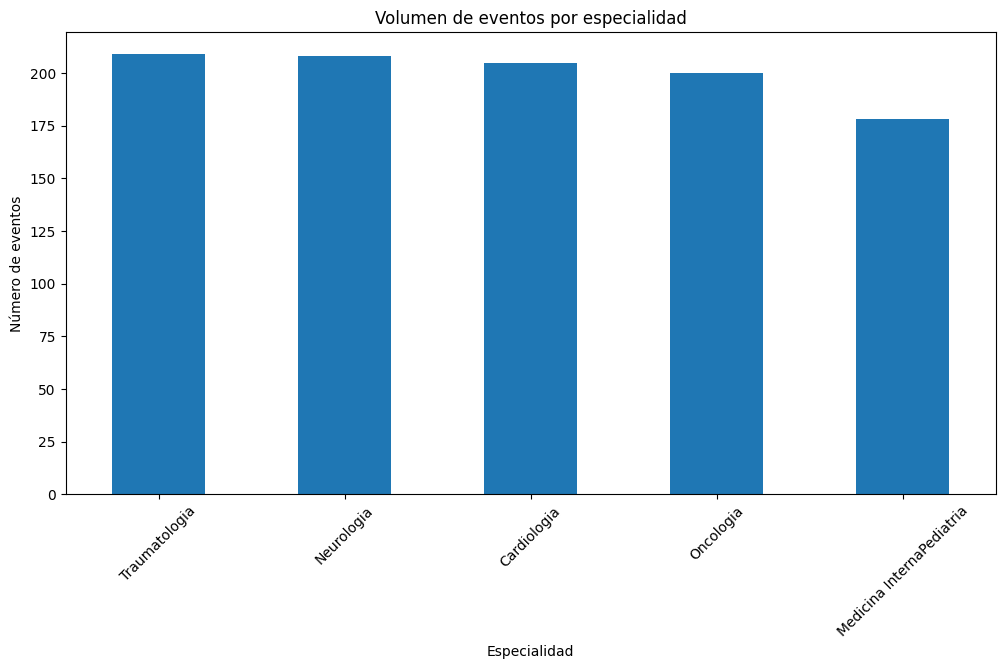


Distribución de diagnósticos
Diagnostico
Nuemonia        0.163
Ictus           0.150
Fractura        0.147
Infarto         0.147
Tumor           0.137
Hipertension    0.132
Diabetes        0.124
Name: proportion, dtype: float64


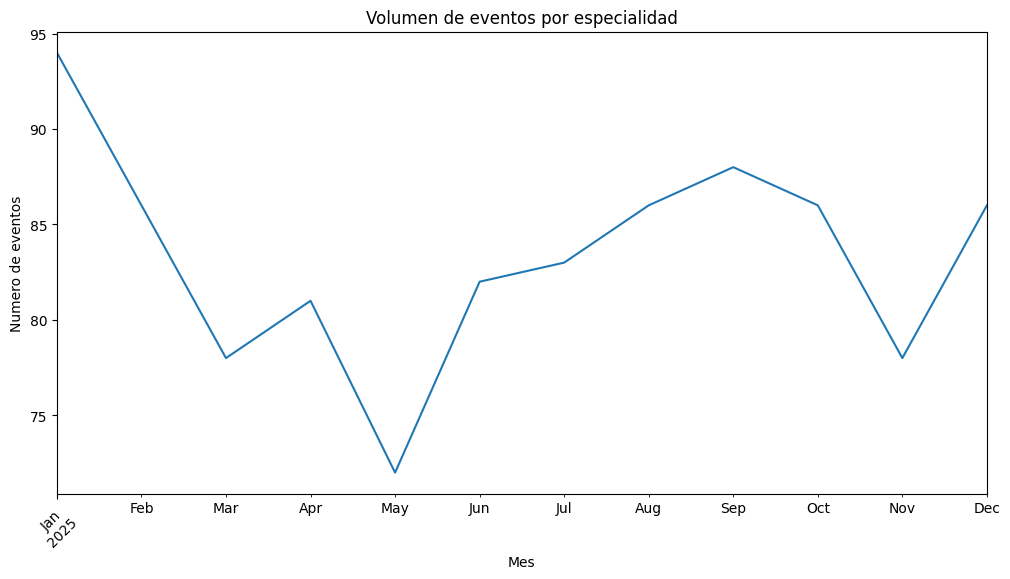


Correlación procedimientos - Duración estancia
Coeficiente de correlación:-0.03153394638430614

Análisis de varianza duración de estancia
F-statistic:0.9022903440419121, p-value:0.4619078402232747


In [4]:
def analisis_eventos_hospitalarios(df):
    #Estadísticas de estancia
    estancias_por_especialidad = df.groupby('Especialidad')['DuracionEstancia'].agg([
        'mean', 'median', 'max', 'count'
    ]).sort_values('count', ascending=False)
    print('Estancia hospitalaria por especialidad')
    print(estancias_por_especialidad)

    #Visualizar carga por especialidades
    plt.figure(figsize = (12,6))
    df['Especialidad'].value_counts().plot(kind = 'bar')
    plt.title('Volumen de eventos por especialidad')
    plt.xlabel('Especialidad')
    plt.ylabel('Número de eventos')
    plt.xticks(rotation = 45)
    plt.show()

    #distribucion por diagnostico
    distribucion_diagnostico = df['Diagnostico'].value_counts(normalize = True)
    print('\nDistribución de diagnósticos')
    print(distribucion_diagnostico)

    #Analisis temporal
    df['Mes'] = df['FechaAdmision'].dt.to_period('M')
    eventos_mensuales = df.groupby('Mes').size()
    plt.figure(figsize = (12,6))
    eventos_mensuales.plot(kind='line')
    plt.title('Volumen de eventos por especialidad')
    plt.xlabel('Mes')
    plt.ylabel('Numero de eventos')
    plt.xticks(rotation = 45)
    plt.show()

    #Indicadores de eficiencia
    #Correlación entre procedimientosy duracion de la estancia
    correlacion = df['Procedimientos'].corr(df['DuracionEstancia'])
    print('\nCorrelación procedimientos - Duración estancia')
    print(f'Coeficiente de correlación:{correlacion}')

    #Prueba estadística de varianza
    grupos_especialidad = [
        grupo['DuracionEstancia']
        for nombre, grupo in df.groupby('Especialidad')
    ]
    f_statistic, p_value = stats.f_oneway(*grupos_especialidad)
    print ('\nAnálisis de varianza duración de estancia')
    print(f'F-statistic:{f_statistic}, p-value:{p_value}')

#Ejecutar el analisis
analisis_eventos_hospitalarios(datos_hospitalarios)